In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_train=pd.read_csv('../hp/Downloads/stock_price_predict/Google_Stock_Price_Train.csv')
df_test=pd.read_csv('../hp/Downloads/stock_price_predict/Google_Stock_Price_Test.csv')

In [5]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
df_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

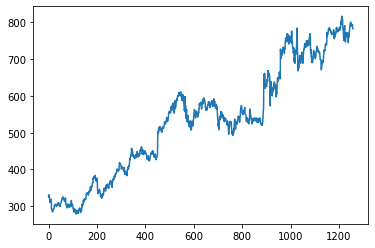

In [8]:
plt.plot(df_train['Open'])

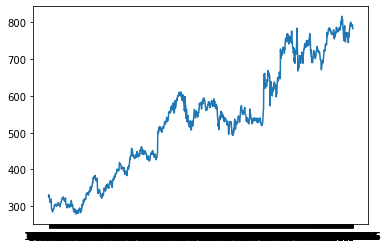

In [9]:
plt.plot(df_train['Date'],df_train['Open'])

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


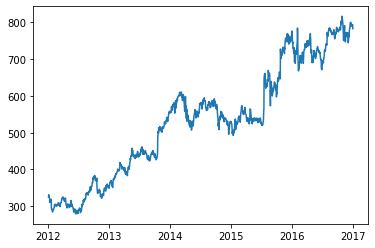

In [11]:
plt.plot(pd.to_datetime(df_train['Date']),df_train['Open'])

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
X=df_train[['Open']]

In [14]:
scaler = MinMaxScaler()

In [15]:
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [17]:
import numpy as np

In [18]:
X.shape
X_final=[]
for i in range(1198):
    row = X_scaled[i:61+i,0]
    X_final.append(row)
X_final = np.array(X_final)

In [19]:
X_final

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08497656, 0.08627874,
        0.08471612],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08627874, 0.08471612,
        0.07454052],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95163331, 0.95725128,
        0.93796041],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95725128, 0.93796041,
        0.93688146]])

In [20]:
X_final.shape

(1198, 61)

In [21]:
X_final[:3]

array([[0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
        0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
        0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
        0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
        0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
        0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
        0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
        0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
        0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
        0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
        0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
        0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656,
        0.08627874],
       [0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
        0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
        0.07474514, 0.02797

In [22]:
X_train=X_final[:,:60]

In [23]:
y_train=X_final[:,-1]

In [24]:
X_train.shape

(1198, 60)

In [25]:
y_train.shape

(1198,)

In [26]:
X_train= X_train.reshape(-1,60,1)

In [27]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [29]:
model = Sequential()
model.add(LSTM(100,return_sequences=True,input_shape = (60,1)))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(1))

In [30]:
np.__version__

'1.19.5'

In [31]:
import tensorflow

In [32]:
tensorflow.__version__

'2.3.0'

In [33]:
!pip install numpy==1.19.5

In [34]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
h = model.fit(X_train,y_train, batch_size=32,epochs=30)

Epoch 1/30
38/38 [==============================] - 23s 602ms/step - loss: 0.0279
Epoch 2/30
38/38 [==============================] - 23s 616ms/step - loss: 0.0025
Epoch 3/30
38/38 [==============================] - 24s 620ms/step - loss: 0.0023
Epoch 4/30
38/38 [==============================] - 23s 618ms/step - loss: 0.0022
Epoch 5/30
38/38 [==============================] - 25s 658ms/step - loss: 0.0025
Epoch 6/30
38/38 [==============================] - 24s 629ms/step - loss: 0.0019
Epoch 7/30
38/38 [==============================] - 23s 615ms/step - loss: 0.0019
Epoch 8/30
38/38 [==============================] - 24s 623ms/step - loss: 0.0017
Epoch 9/30
38/38 [==============================] - 24s 619ms/step - loss: 0.0016
Epoch 10/30
38/38 [==============================] - 23s 615ms/step - loss: 0.0017
Epoch 11/30
38/38 [==============================] - 23s 618ms/step - loss: 0.0016
Epoch 12/30
38/38 [==============================] - 23s 616ms/step - loss: 0.0015
Epoch 13/30
3

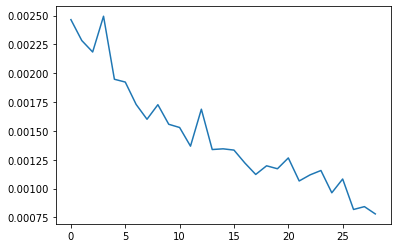

In [36]:
plt.plot(h.history['loss'][1:])

In [37]:
df_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [38]:
X_test_scaled = scaler.transform(df_test[['Open']])

In [39]:
X_test_scaled.shape

(20, 1)

In [40]:
X_scaled[-60:,:]

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [41]:
# concat last 60days open with test 20days open
X = np.vstack([X_scaled[-60:,:],X_test_scaled])
X.shape

(80, 1)

In [42]:
# X.shape=> 20,61
X_final = []
for i in range(20):
    row = X[i:61+i,0]
    X_final.append(row)
X_final = np.array(X_final)
X_final.shape

(20, 61)

In [43]:
X_test = X_final[:,:60]
y_test = X_final[:,-1]

In [44]:
X_test = X_test.reshape(-1,60,1)

In [45]:
y_pre = model.predict(X_test)

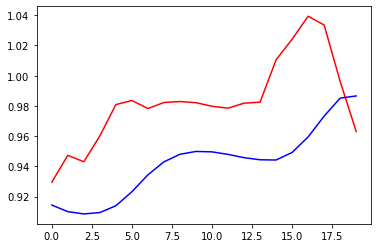

In [46]:
plt.plot(y_test,c='red')
plt.plot(y_pre, c='blue')